# Conexão com postgres e Relatorios do Sistema

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [ ]:
#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas

### Importando bibliotecas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [ ]:
conn = psycopg2.connect(host="rajje.db.elephantsql.com",database="xugnmzhe", user="xugnmzhe", password="N3BJNTsZq40cEeKL4RAGHUa9G0ec2zEK")

# Relatórios

## Relatório 1
### Objetivo: Obter relatório que mostre o nome de cada produto e a quantidade de pessoas que o consomem. Exibindo os resultado em forma crescente por nome do produto.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
                          select count(pessoa_consome.fk_cod_produto) as qtd_consumidores, produto.nome_produto as produto
                          from pessoa_consome
                          right join produto on(produto.cod_produto = pessoa_consome.fk_cod_produto)
                          group by produto.nome_produto
                          order by produto;
                            """,conn)
res

,qtd_consumidores,produto
0,1,Água sanitária
1,2,Alcool em gel
2,2,Antibiotico
3,6,Arroz
4,1,Batata Monalise
5,1,Café
6,2,Carne de porco
7,2,Cloro
8,3,Desinfetante
9,1,Dorflex


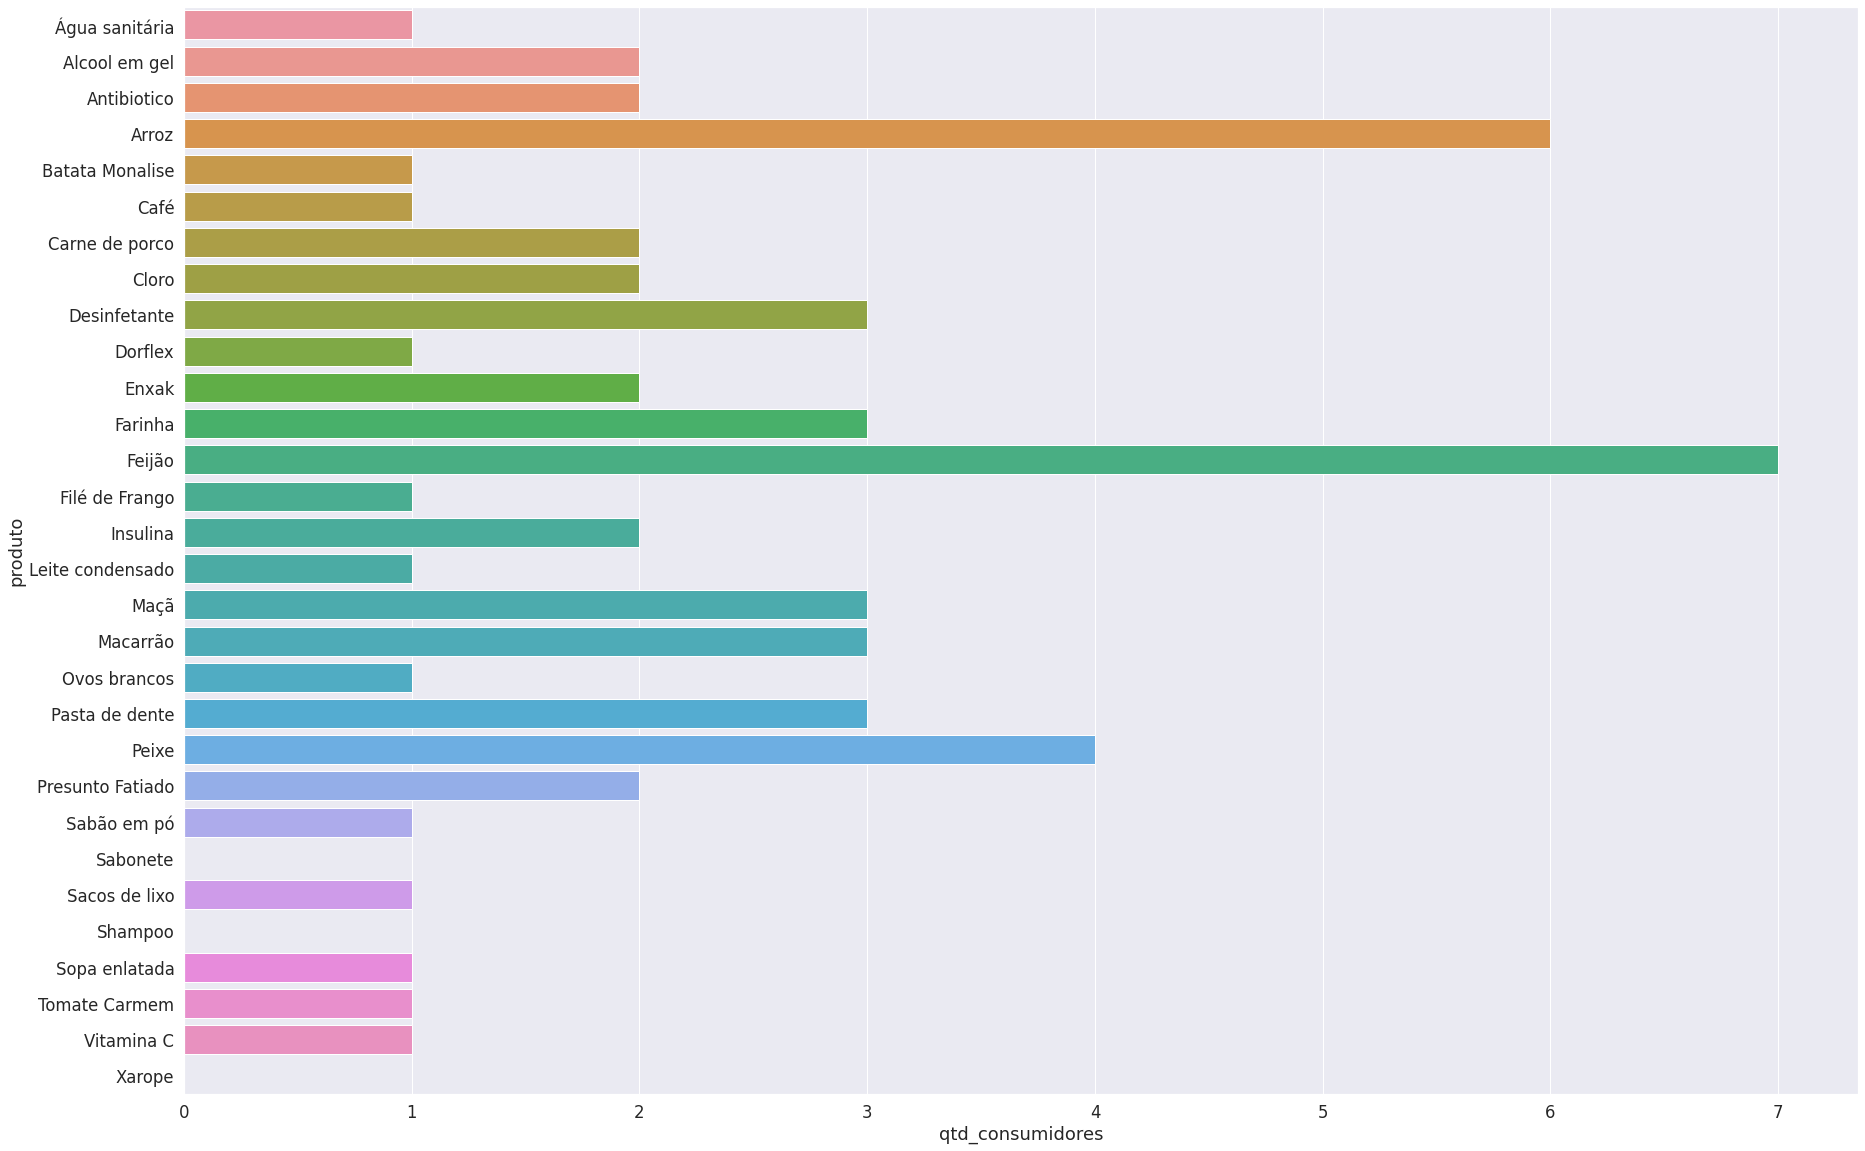

In [ ]:
plt.figure(figsize=(30,20))
sns.set(font_scale=1.5)
sns.barplot(x='qtd_consumidores',y='produto',data=res);

# ==========================================================================================
## Relatório 2
### Objetivo: Obter relatório relativo aos fornecedores. Listando o nome de cada fornecedor e a quantidade de produtos que cada um deles fornece. Apresentando os resultando ordenados pela quantidade de produtos fornecidos.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
                            select fornecedor.nome_fornecedor, count(fornecedor_produto.fk_cod_fornecedor) as qtd_prod_fornecidos
                            from fornecedor_produto
                            inner join fornecedor
                            on(fornecedor_produto.fk_cod_fornecedor = fornecedor.cod_fornecedor)
                            group by fornecedor.nome_fornecedor
                            order by fornecedor.nome_fornecedor desc;
                            """,conn)
res

,nome_fornecedor,qtd_prod_fornecidos
0,Ryu Alimentos,3
1,MegaG,4
2,Limpeza do dia,3
3,G2F,5
4,Famarcia do povo,4
5,Distrimed,4
6,Alimentos CIA,3


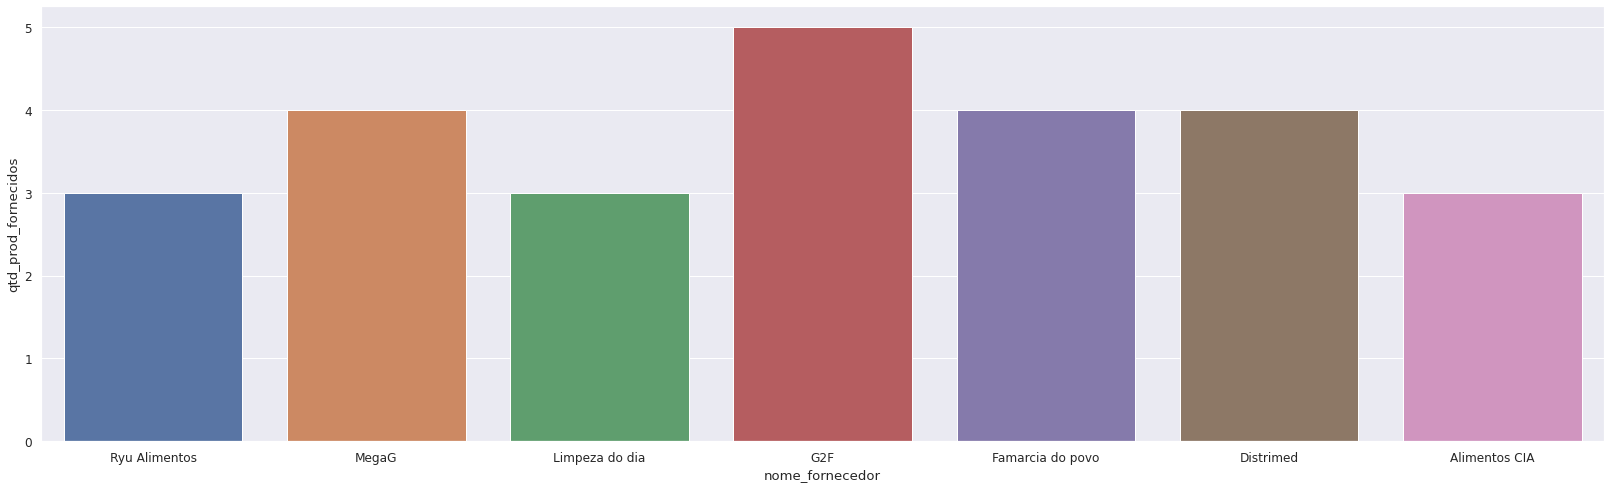

In [ ]:
plt.figure(figsize=(28,8))
sns.set(font_scale=1.1)
sns.barplot(x='nome_fornecedor',y='qtd_prod_fornecidos',data=res);

# ============================================================
## Relatório 3
### Objetivo: Obter relatorio que mostre o nome do grupo familiar e a soma dos preços (unitários) dos produtos consumidos por cada familia. Exibindo os resultados ordenados pelo nome do grupo familiar.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
                            SELECT grupo_familiar.nome_grupo_familiar, sum(produto.preco_produto) as soma_preco_produtos
                            FROM pessoa
                            inner join grupo_familiar
                            ON(grupo_familiar.cod_grupo_familiar = pessoa.fk_cod_grupo_familiar)
                            INNER JOIN pessoa_consome
                            ON(pessoa_consome.fk_cod_pessoa = pessoa.cod_pessoa)
                            INNER JOIN produto
                            on(produto.cod_produto = pessoa_consome.fk_cod_produto)
                            GROUP BY grupo_familiar.nome_grupo_familiar
                            ORDER BY grupo_familiar.nome_grupo_familiar;
                  """,conn)
res

,nome_grupo_familiar,soma_preco_produtos
0,Familia de pescadores - VV,149.56
1,Minha Casa,192.86
2,Taberna dos viajantes - ANDO,189.03


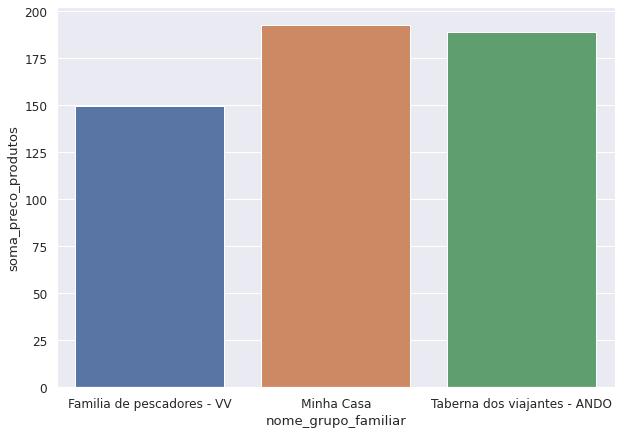

In [ ]:
plt.figure(figsize=(10,7));
sns.barplot(x='nome_grupo_familiar',y='soma_preco_produtos',data=res);

# ==========================================================================================
## Relatório 4
### Objetivo: Obter relatório relativo aos grupos familiares, listando o nome do grupo familiar, os integrantes de cada grupo familiar, o que cada um deles consome, o preço do produto consumido, qual o tipo desse produto e quem o fornece. Ordenando pelo nome do grupo familiar e em seguida, o nome de cada integrate, de forma crescente.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
                            SELECT grupo_familiar.nome_grupo_familiar, pessoa.nome_pessoa, 
                            produto.nome_produto, produto.preco_produto, tipo_produto.nome_tipo_produto, fornecedor.nome_fornecedor
                            FROM pessoa
                            INNER JOIN grupo_familiar
                            ON(grupo_familiar.cod_grupo_familiar = pessoa.fk_cod_grupo_familiar)
                            INNER JOIN pessoa_consome
                            ON(pessoa_consome.fk_cod_pessoa = pessoa.cod_pessoa)
                            INNER JOIN produto
                            ON(produto.cod_produto = pessoa_consome.fk_cod_produto)
                            INNER JOIN tipo_produto
                            ON(tipo_produto.cod_tipo_produto = produto.fk_cod_tipo_produto)
                            INNER JOIN fornecedor_produto
                            ON(fornecedor_produto.fk_cod_produto = produto.cod_produto)
                            INNER JOIN fornecedor
                            ON(fornecedor.cod_fornecedor = fornecedor_produto.fk_cod_fornecedor)
                            ORDER BY grupo_familiar.nome_grupo_familiar, pessoa.nome_pessoa
                            """,conn)
res

,nome_grupo_familiar,nome_pessoa,nome_produto,preco_produto,nome_tipo_produto,nome_fornecedor
0,Familia de pescadores - VV,Eliot S,Farinha,5.39,Alimenticio,MegaG
1,Familia de pescadores - VV,Eliot S,Presunto Fatiado,8.80,Alimenticio,Famarcia do povo
2,Familia de pescadores - VV,Eliot S,Feijão,5.99,Alimenticio,MegaG
3,Familia de pescadores - VV,Fabio Brazza,Alcool em gel,11.99,Limpeza Pessoal,Limpeza do dia
4,Familia de pescadores - VV,Fabio Brazza,Feijão,5.99,Alimenticio,MegaG
5,Familia de pescadores - VV,Fabio Brazza,Dorflex,3.68,Medicinal,Distrimed
6,Familia de pescadores - VV,Haley Quinn,Maçã,2.38,Alimenticio,Famarcia do povo
7,Familia de pescadores - VV,Haley Quinn,Ovos brancos,6.70,Alimenticio,Limpeza do dia
8,Familia de pescadores - VV,Haley Quinn,Desinfetante,2.59,Limpeza Geral,G2F
9,Familia de pescadores - VV,Nair P,Arroz,7.79,Alimenticio,MegaG


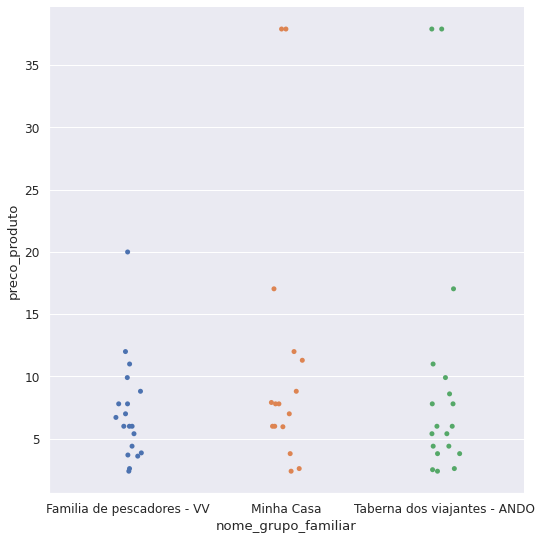

In [ ]:
sns.set(font_scale=1.1);
sns.catplot(x="nome_grupo_familiar", y="preco_produto", data=res, height=7.7);

# ============================================================
## Relatório 5
### Objetivo: Obter o nome de todas as pessoas, a data de nascimento, a idade de cada um, quais produtos ela consome e o tipo desse produto. Ordenando de forma crescente pelo nome da pessoa.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
                            SELECT pessoa.nome_pessoa, pessoa.data_nascimento,
                            date_part('year', (AGE(current_date, data_nascimento))) as idade,
                            produto.nome_produto, tipo_produto.nome_tipo_produto
                            FROM pessoa
                            INNER JOIN grupo_familiar
                            ON(grupo_familiar.cod_grupo_familiar = pessoa.fk_cod_grupo_familiar)
                            INNER JOIN pessoa_consome
                            ON(pessoa_consome.fk_cod_pessoa = pessoa.cod_pessoa)
                            INNER JOIN produto
                            ON(produto.cod_produto = pessoa_consome.fk_cod_produto)
                            INNER JOIN tipo_produto
                            ON(tipo_produto.cod_tipo_produto = produto.fk_cod_tipo_produto)
                            INNER JOIN fornecedor_produto
                            ON(fornecedor_produto.fk_cod_produto = produto.cod_produto)
                            INNER JOIN fornecedor
                            ON(fornecedor.cod_fornecedor = fornecedor_produto.fk_cod_fornecedor)
                            ORDER BY pessoa.nome_pessoa;
                            """,conn)
res

,nome_pessoa,data_nascimento,idade,nome_produto,nome_tipo_produto
0,Alexander Kernel,1990-09-06,30.0,Vitamina C,Medicinal
1,Alexander Kernel,1990-09-06,30.0,Carne de porco,Alimenticio
2,Alexander Kernel,1990-09-06,30.0,Arroz,Alimenticio
3,Arthur Excalibur,1998-07-30,22.0,Sacos de lixo,Limpeza Geral
4,Arthur Excalibur,1998-07-30,22.0,Feijão,Alimenticio
5,Borz Graal,1955-08-21,65.0,Macarrão,Alimenticio
6,Clara L,2007-12-20,12.0,Água sanitária,Limpeza Geral
7,Clara L,2007-12-20,12.0,Antibiotico,Medicinal
8,Clara L,2007-12-20,12.0,Alcool em gel,Limpeza Pessoal
9,Clara L,2007-12-20,12.0,Peixe,Alimenticio


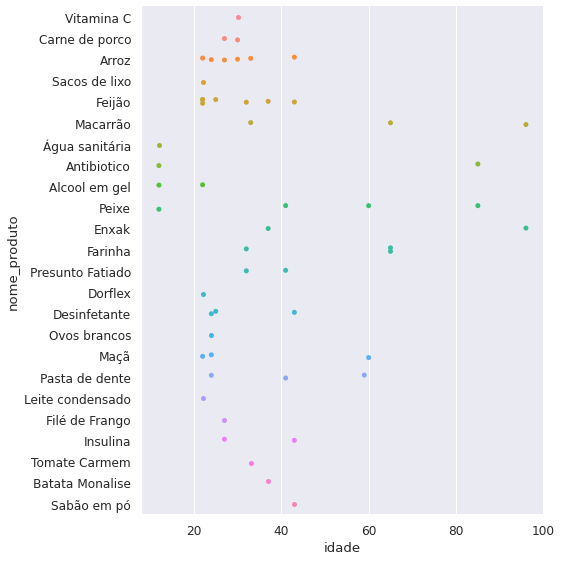

In [ ]:
sns.set(font_scale=1.1);
sns.catplot(x="idade", y="nome_produto", data=res, height=8);